<a href="https://colab.research.google.com/github/univai-courses-ghf/Double-Descent/blob/main/Double_Descent_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()

# Log files

In [2]:
dfs = [
    pd.read_csv("https://raw.githubusercontent.com/univai-courses-ghf/Double-Descent/main/logs/log_1.txt"), 
    pd.read_csv("https://raw.githubusercontent.com/univai-courses-ghf/Double-Descent/main/logs/log_2.txt"),
    pd.read_csv("https://raw.githubusercontent.com/univai-courses-ghf/Double-Descent/main/logs/log_4.txt"),
    pd.read_csv("https://raw.githubusercontent.com/univai-courses-ghf/Double-Descent/main/logs/log_8.txt"),
    pd.read_csv("https://raw.githubusercontent.com/univai-courses-ghf/Double-Descent/main/logs/log_16.txt"),
    pd.read_csv("https://raw.githubusercontent.com/univai-courses-ghf/Double-Descent/main/logs/log_32.txt"),
    pd.read_csv("https://raw.githubusercontent.com/univai-courses-ghf/Double-Descent/main/logs/log_64.txt"),
]

def make_array(key):
    ddd = np.zeros((500, 64))
    for i in range(1,65):
        a = int(np.log2(i)//1)
        if a == 6:
            ddd[:,i-1] = dfs[a][key].values
        else:
            b = a + 1
            ddd[:,i-1] = ((2**b-i)*dfs[a][key].values + (i-2**a)*dfs[b][key].values) / (2**b-2**a)
    return ddd

ddd_train_error = make_array("Train Error")
ddd_test_error = make_array("Test Error")



# Train and Test DataFrames

In [3]:
ddd_test_error.shape

(500, 64)

In [4]:
ddd_train_error.shape

(500, 64)

In [11]:
y_idx = range(200)

# Plot Train and Test Error for all epochs

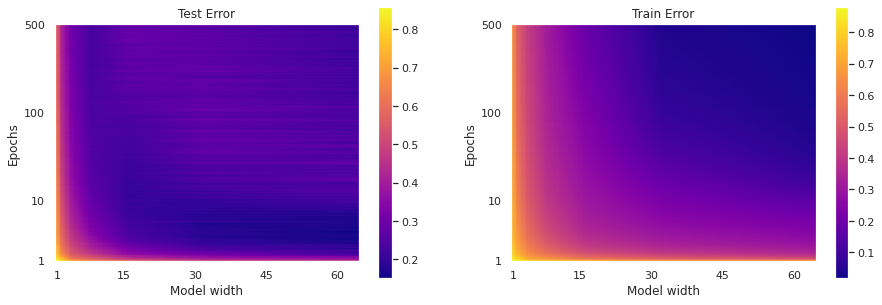

In [14]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 2, 1)
im1 = ax1.imshow(np.flipud(ddd_test_error[y_idx, :]), cmap='plasma', aspect=0.25)
ax1.set_xlabel("Model width")
ax1.set_ylabel("Epochs")
ax1.set_xticks([0, 14, 29, 44, 59])
ax1.set_xticklabels([1, 15, 30, 45, 60,])
ax1.set_yticks([0, 74, 148, 199])
ax1.set_yticklabels([500, 100, 10, 1,])
ax1.set_title("Test Error")
ax1.grid(False)
fig.colorbar(im1, ax=ax1)

ax2 = fig.add_subplot(1, 2, 2)
im2 = ax2.imshow(np.flipud(ddd_train_error[y_idx, :]), cmap='plasma', aspect=0.25)
ax2.set_xlabel("Model width")
ax2.set_ylabel("Epochs")
ax2.set_xticks([0, 14, 29, 44, 59])
ax2.set_xticklabels([1, 15, 30, 45, 60,])
ax2.set_yticks([0, 74, 148, 199])
ax2.set_yticklabels([500, 100, 10, 1,])
ax2.set_title("Train Error")
ax2.grid(False)
fig.colorbar(im2, ax=ax2)

plt.show()

# Plot Train and Test Error for one epoch

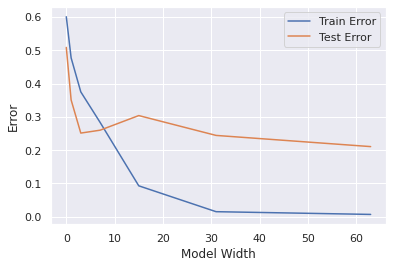

In [7]:
epoch = 499
plt.plot(ddd_train_error[epoch],label='Train Error')
plt.plot(ddd_test_error[epoch],label='Test Error')
plt.xlabel('Model Width')
plt.ylabel('Error')
plt.legend()